# Лабораторна робота #4
# Студента групи МІТ-31 
# З дисципліни Інтелектуальний аналіз даних
# Невмержицький Олександр

# Завдання
1. Здійснити загальні операції з використанням TensorFlow (створити набір даних (розмір за власним рішенням) у вигляді тензорів, провести CRUD операції над даними (скаляр, вектор, матриця)).
2. Згенерувати набір даних для регресії та класифікації з використанням TensorFlow
3. Здійснити графічний аналіз наборів даних за допомогою Matplotlib
4. Відповіді оформити .ipynb документом
5. Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab4 де має бути .ipynb файл та необхідні файли з даними

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import tensorflow as tf

In [58]:
tf1 = tf.constant([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
print(tf1)
print(np.square(tf1))
tf1 = tf1 + 10
print(tf1)
tf1_new = tf.gather(tf1, [0])
print(tf1_new)
scalar = tf.constant(9)
scalar
scalar.ndim
vector.ndim
mat1 = tf.constant([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
mat1
mat1.ndim
mat2 = tf.constant([[1., 0., 0.],
                    [0., 1., 0.],
                    [0., 0., 1.]], dtype=tf.float16)

mat2
mat2.ndim

tf.Tensor(
[[1 0 0]
 [0 1 0]
 [0 0 1]], shape=(3, 3), dtype=int32)
[[1 0 0]
 [0 1 0]
 [0 0 1]]
tf.Tensor(
[[11 10 10]
 [10 11 10]
 [10 10 11]], shape=(3, 3), dtype=int32)
tf.Tensor([[11 10 10]], shape=(1, 3), dtype=int32)


2

In [59]:
tensor = tf.constant([[[11, 12, 13,],
                       [21, 22, 23]],
                      [[31, 32, 33],
                       [41, 42, 43]],
                      [[51, 52, 53],
                       [61, 62, 63]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[11, 12, 13],
        [21, 22, 23]],

       [[31, 32, 33],
        [41, 42, 43]],

       [[51, 52, 53],
        [61, 62, 63]]])>

In [60]:
tensor.ndim

3

In [61]:
rnd1 = tf.random.Generator.from_seed(70)
rnd1 = rnd1.normal(shape=(40, 20))
rnd2 = tf.random.Generator.from_seed(10)
rnd2 = rnd2.normal(shape=(50, 30))

In [62]:
df2 = pd.DataFrame(np.random.randint(0, 10, (8, 8)), columns=["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8"])
print(df2)
print(df2.describe(include='all'))

   x1  x2  x3  x4  x5  x6  x7  x8
0   6   3   0   2   0   2   4   1
1   3   7   0   4   3   1   0   7
2   2   4   3   9   6   7   6   7
3   7   1   7   1   9   5   6   4
4   5   5   1   5   6   7   5   0
5   3   6   6   9   2   6   0   5
6   8   1   0   9   9   7   3   5
7   4   9   8   4   9   1   1   9
            x1        x2        x3        x4        x5        x6        x7  \
count  8.00000  8.000000  8.000000  8.000000  8.000000  8.000000  8.000000   
mean   4.75000  4.500000  3.125000  5.375000  5.500000  4.500000  3.125000   
std    2.12132  2.828427  3.399054  3.248626  3.505098  2.725541  2.531939   
min    2.00000  1.000000  0.000000  1.000000  0.000000  1.000000  0.000000   
25%    3.00000  2.500000  0.000000  3.500000  2.750000  1.750000  0.750000   
50%    4.50000  4.500000  2.000000  4.500000  6.000000  5.500000  3.500000   
75%    6.25000  6.250000  6.250000  9.000000  9.000000  7.000000  5.250000   
max    8.00000  9.000000  8.000000  9.000000  9.000000  7.000000  6.00

In [63]:
training_df: pd.DataFrame = pd.DataFrame(
    data={
        'x1': np.random.rand(100),
        'x2': np.random.rand(100),
        'x3': np.random.rand(100),
        'target': np.random.randint(0, 50, 100)
    }
)
features = ['x1', 'x2', 'x3']
print(training_df)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(training_df[features].values, tf.float32),
            tf.cast(training_df['target'].values, tf.int32)
        )
    )
)

for features_tensor, target_tensor in training_dataset:
    print(f'features:{features_tensor} target:{target_tensor}')

          x1        x2        x3  target
0   0.874969  0.302412  0.391791       4
1   0.101443  0.047269  0.073159      37
2   0.303024  0.044246  0.962645      20
3   0.057926  0.445782  0.888313      41
4   0.166722  0.214204  0.976486      11
..       ...       ...       ...     ...
95  0.441471  0.886821  0.083264      14
96  0.451151  0.653019  0.338599       3
97  0.297912  0.431561  0.376335      45
98  0.079645  0.284213  0.212860      10
99  0.381846  0.712328  0.411816       9

[100 rows x 4 columns]
features:[0.8749686  0.30241162 0.39179146] target:4
features:[0.1014425  0.04726921 0.07315947] target:37
features:[0.30302352 0.04424613 0.9626449 ] target:20
features:[0.05792604 0.44578183 0.8883131 ] target:41
features:[0.16672154 0.21420366 0.97648615] target:11
features:[0.8027055 0.7279174 0.3069833] target:47
features:[0.35896972 0.16187102 0.0473118 ] target:4
features:[0.2817923  0.20397352 0.8934276 ] target:23
features:[0.8871247  0.27605945 0.81269574] target:28
fea

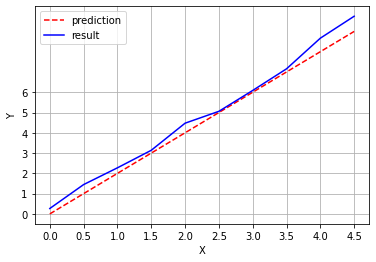

In [64]:
x = np.arange(0, 5, 0.5)
y1 = x * 2

adder = np.random.random(len(x)) * 1.5 - 0.7
y2 = y1 + adder

plt.figure()
plt.grid()
plt.xticks(x)
plt.yticks(range(int(x[-1] * 1.5 + 1)))
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x, y1, "r--", label="prediction")
plt.plot(x, y2, "b", label="result")

plt.legend()
plt.show()

In [65]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y2, y1)
mse = metrics.mean_squared_error(y2, y1)
print(mae)
print(mse)

0.33182277291305173
0.16303985199186738


In [66]:
df = pd.DataFrame(np.array([x, y2, y1]).swapaxes(0,1), columns=['X', 'Y', 'Y_hat'])
print(df)
with open('info.csv', 'w') as f:
    f.write(df.to_csv(index=False))

     X         Y  Y_hat
0  0.0  0.267104    0.0
1  0.5  1.447049    1.0
2  1.0  2.273491    2.0
3  1.5  3.137626    3.0
4  2.0  4.474128    4.0
5  2.5  5.059373    5.0
6  3.0  6.088587    6.0
7  3.5  7.155395    7.0
8  4.0  8.666748    8.0
9  4.5  9.748727    9.0


In [67]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x, y1, epochs=80)

Epoch 1/80
1/1 [==============================] - 0s 391ms/step - loss: 3.2174 - mae: 3.2174
Epoch 2/80
1/1 [==============================] - 0s 3ms/step - loss: 3.1595 - mae: 3.1595
Epoch 3/80
1/1 [==============================] - 0s 4ms/step - loss: 3.1025 - mae: 3.1025
Epoch 4/80
1/1 [==============================] - 0s 4ms/step - loss: 3.0455 - mae: 3.0455
Epoch 5/80
1/1 [==============================] - 0s 4ms/step - loss: 2.9885 - mae: 2.9885
Epoch 6/80
1/1 [==============================] - 0s 6ms/step - loss: 2.9314 - mae: 2.9314
Epoch 7/80
1/1 [==============================] - 0s 4ms/step - loss: 2.8744 - mae: 2.8744
Epoch 8/80
1/1 [==============================] - 0s 3ms/step - loss: 2.8174 - mae: 2.8174
Epoch 9/80
1/1 [==============================] - 0s 3ms/step - loss: 2.7604 - mae: 2.7604
Epoch 10/80
1/1 [==============================] - 0s 4ms/step - loss: 2.7033 - mae: 2.7033
Epoch 11/80
1/1 [==============================] - 0s 4ms/step - loss: 2.6463 - mae: 2.

In [68]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

(10, 0)

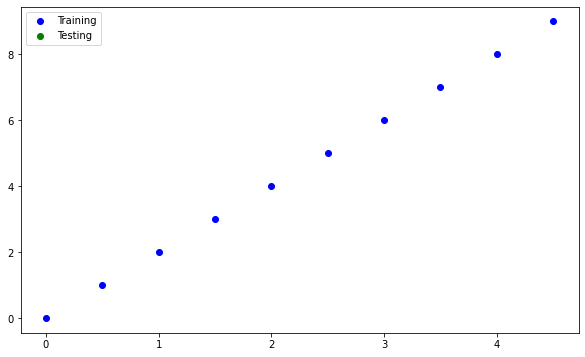

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', label='Training')
plt.scatter(X_test, y_test, c='g', label='Testing')
plt.legend()

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train, y_train, epochs=80, verbose=0)

In [72]:
model.predict([20.0])

array([[39.942238]], dtype=float32)

In [73]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

model_1.fit(x, y1, epochs=20, verbose=0)

In [74]:
def plot_decision_boundary(model, X, y):
    
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
 
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [75]:
tf.random.set_seed(42)

X_regression = np.arange(0, 100, 5)
y_regression = np.arange(100, 110, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [76]:
model_1.evaluate(x, y1)

1/1 [==============================] - 0s 173ms/step - loss: -53.5553 - accuracy: 0.2000


[-53.5552864074707, 0.20000000298023224]

In [77]:
len(x)

10

In [78]:
X_train, y_train = x[:800], y1[:800]
X_test, y_test = x[800:], y1[800:]

X_train.shape, X_test.shape

((10,), (0,))

In [79]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), 
                metrics=['accuracy'])

history = model_2.fit(X_train, y_train, epochs=25)

C:\Users\Nevm PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
1/1 [==============================] - 1s 752ms/step - loss: 3.6568 - accuracy: 0.1000
Epoch 2/25
1/1 [==============================] - 0s 5ms/step - loss: 3.3166 - accuracy: 0.0000e+00
Epoch 3/25
1/1 [==============================] - 0s 6ms/step - loss: 2.9870 - accuracy: 0.0000e+00
Epoch 4/25
1/1 [==============================] - 0s 5ms/step - loss: 2.6683 - accuracy: 0.1000
Epoch 5/25
1/1 [==============================] - 0s 5ms/step - loss: 2.3606 - accuracy: 0.1000
Epoch 6/25
1/1 [==============================] - 0s 6ms/step - loss: 2.0638 - accuracy: 0.1000
Epoch 7/25
1/1 [==============================] - 0s 4ms/step - loss: 1.7780 - accuracy: 0.1000
Epoch 8/25
1/1 [==============================] - 0s 5ms/step - loss: 1.5038 - accuracy: 0.1000
Epoch 9/25
1/1 [==============================] - 0s 4ms/step - loss: 1.2406 - accuracy: 0.1000
Epoch 10/25
1/1 [==============================] - 0s 5ms/step - loss: 0.9881 - accuracy: 0.1000
Epoch 11/25
1/1 [============

In [80]:
pd.DataFrame(history.history)

,loss,accuracy
0,3.656841,0.1
1,3.316552,0.0
2,2.987022,0.0
3,2.668347,0.1
4,2.360600,0.1
5,2.063806,0.1
6,1.777956,0.1
7,1.503834,0.1
8,1.240631,0.1
9,0.988077,0.1


Text(0.5, 1.0, '2 ')

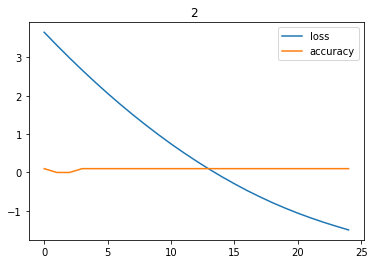

In [81]:
pd.DataFrame(history.history).plot()
plt.title("2 ")

In [82]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x, y1, epochs=80)

Epoch 1/80
1/1 [==============================] - 1s 516ms/step - loss: 3.2174 - mae: 3.2174
Epoch 2/80
1/1 [==============================] - 0s 4ms/step - loss: 3.1595 - mae: 3.1595
Epoch 3/80
1/1 [==============================] - 0s 3ms/step - loss: 3.1025 - mae: 3.1025
Epoch 4/80
1/1 [==============================] - 0s 2ms/step - loss: 3.0455 - mae: 3.0455
Epoch 5/80
1/1 [==============================] - 0s 3ms/step - loss: 2.9885 - mae: 2.9885
Epoch 6/80
1/1 [==============================] - 0s 3ms/step - loss: 2.9314 - mae: 2.9314
Epoch 7/80
1/1 [==============================] - 0s 9ms/step - loss: 2.8744 - mae: 2.8744
Epoch 8/80
1/1 [==============================] - 0s 4ms/step - loss: 2.8174 - mae: 2.8174
Epoch 9/80
1/1 [==============================] - 0s 10ms/step - loss: 2.7604 - mae: 2.7604
Epoch 10/80
1/1 [==============================] - 0s 11ms/step - loss: 2.7033 - mae: 2.7033
Epoch 11/80
1/1 [==============================] - 0s 2ms/step - loss: 2.6463 - mae: 

In [83]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

(10, 0)

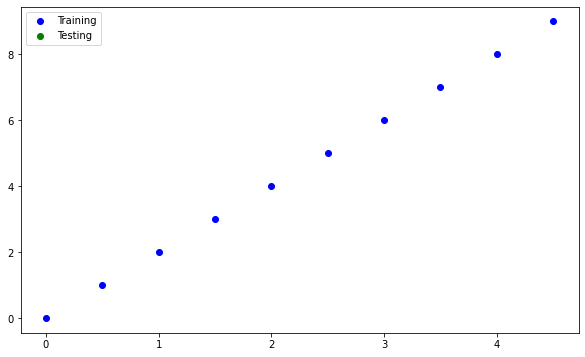

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', label='Training')
plt.scatter(X_test, y_test, c='g', label='Testing')
plt.legend()

In [85]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.fit(X_train, y_train, epochs=80, verbose=0)

In [87]:
model.predict([20.0])

array([[39.942238]], dtype=float32)